In [64]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')


plt.style.use('ggplot')

In [65]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 9.4 MB/s eta 0:00:00


In [66]:

df = pd.read_csv('HOMO1.csv')

In [67]:
df.head()

Lattice Type  Thickness (mm)  Young Modulus of Alloy (Gpa)  Poisson Ratio  \
0  Simple Cubic             0.1                         208.0           0.28   
1  Simple Cubic             0.2                         208.0           0.28   
2  Simple Cubic             0.3                         208.0           0.28   
3  Simple Cubic             0.4                         208.0           0.28   
4  Simple Cubic             0.5                         208.0           0.28   

   Conductivity of Alloy (W/m.K)  Young Modulus of Architected Material (Gpa)  
0                            9.7                                     0.086970  
1                            9.7                                     0.527124  
2                            9.7                                     1.164010  
3                            9.7                                     2.017600  
4                            9.7                                     3.052160

In [68]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Lattice Type']= label_encoder.fit_transform(df['Lattice Type'])

In [69]:
df.describe()

Lattice Type  Thickness (mm)  Young Modulus of Alloy (Gpa)  \
count     110.00000      110.000000                    110.000000   
mean        5.00000        0.300000                    173.400000   
std         3.17675        0.142069                     34.758353   
min         0.00000        0.100000                    138.800000   
25%         2.00000        0.200000                    138.800000   
50%         5.00000        0.300000                    173.400000   
75%         8.00000        0.400000                    208.000000   
max        10.00000        0.500000                    208.000000   

       Poisson Ratio  Conductivity of Alloy (W/m.K)  \
count     110.000000                     110.000000   
mean        0.311000                       8.200000   
std         0.031142                       1.506865   
min         0.280000                       6.700000   
25%         0.280000                       6.700000   
50%         0.311000                       8.200000   
75%         0.342000                       9.700000   
max         0.342000                       9.700000   

       Young Modulus of Architected Material (Gpa)  
count                                   110.000000  
mean                                      9.928565  
std                                      13.873758  
min                                       0.000280  
25%                                       0.236841  
50%                                       2.019480  
75%                                      16.961050  
max                                      55.202500

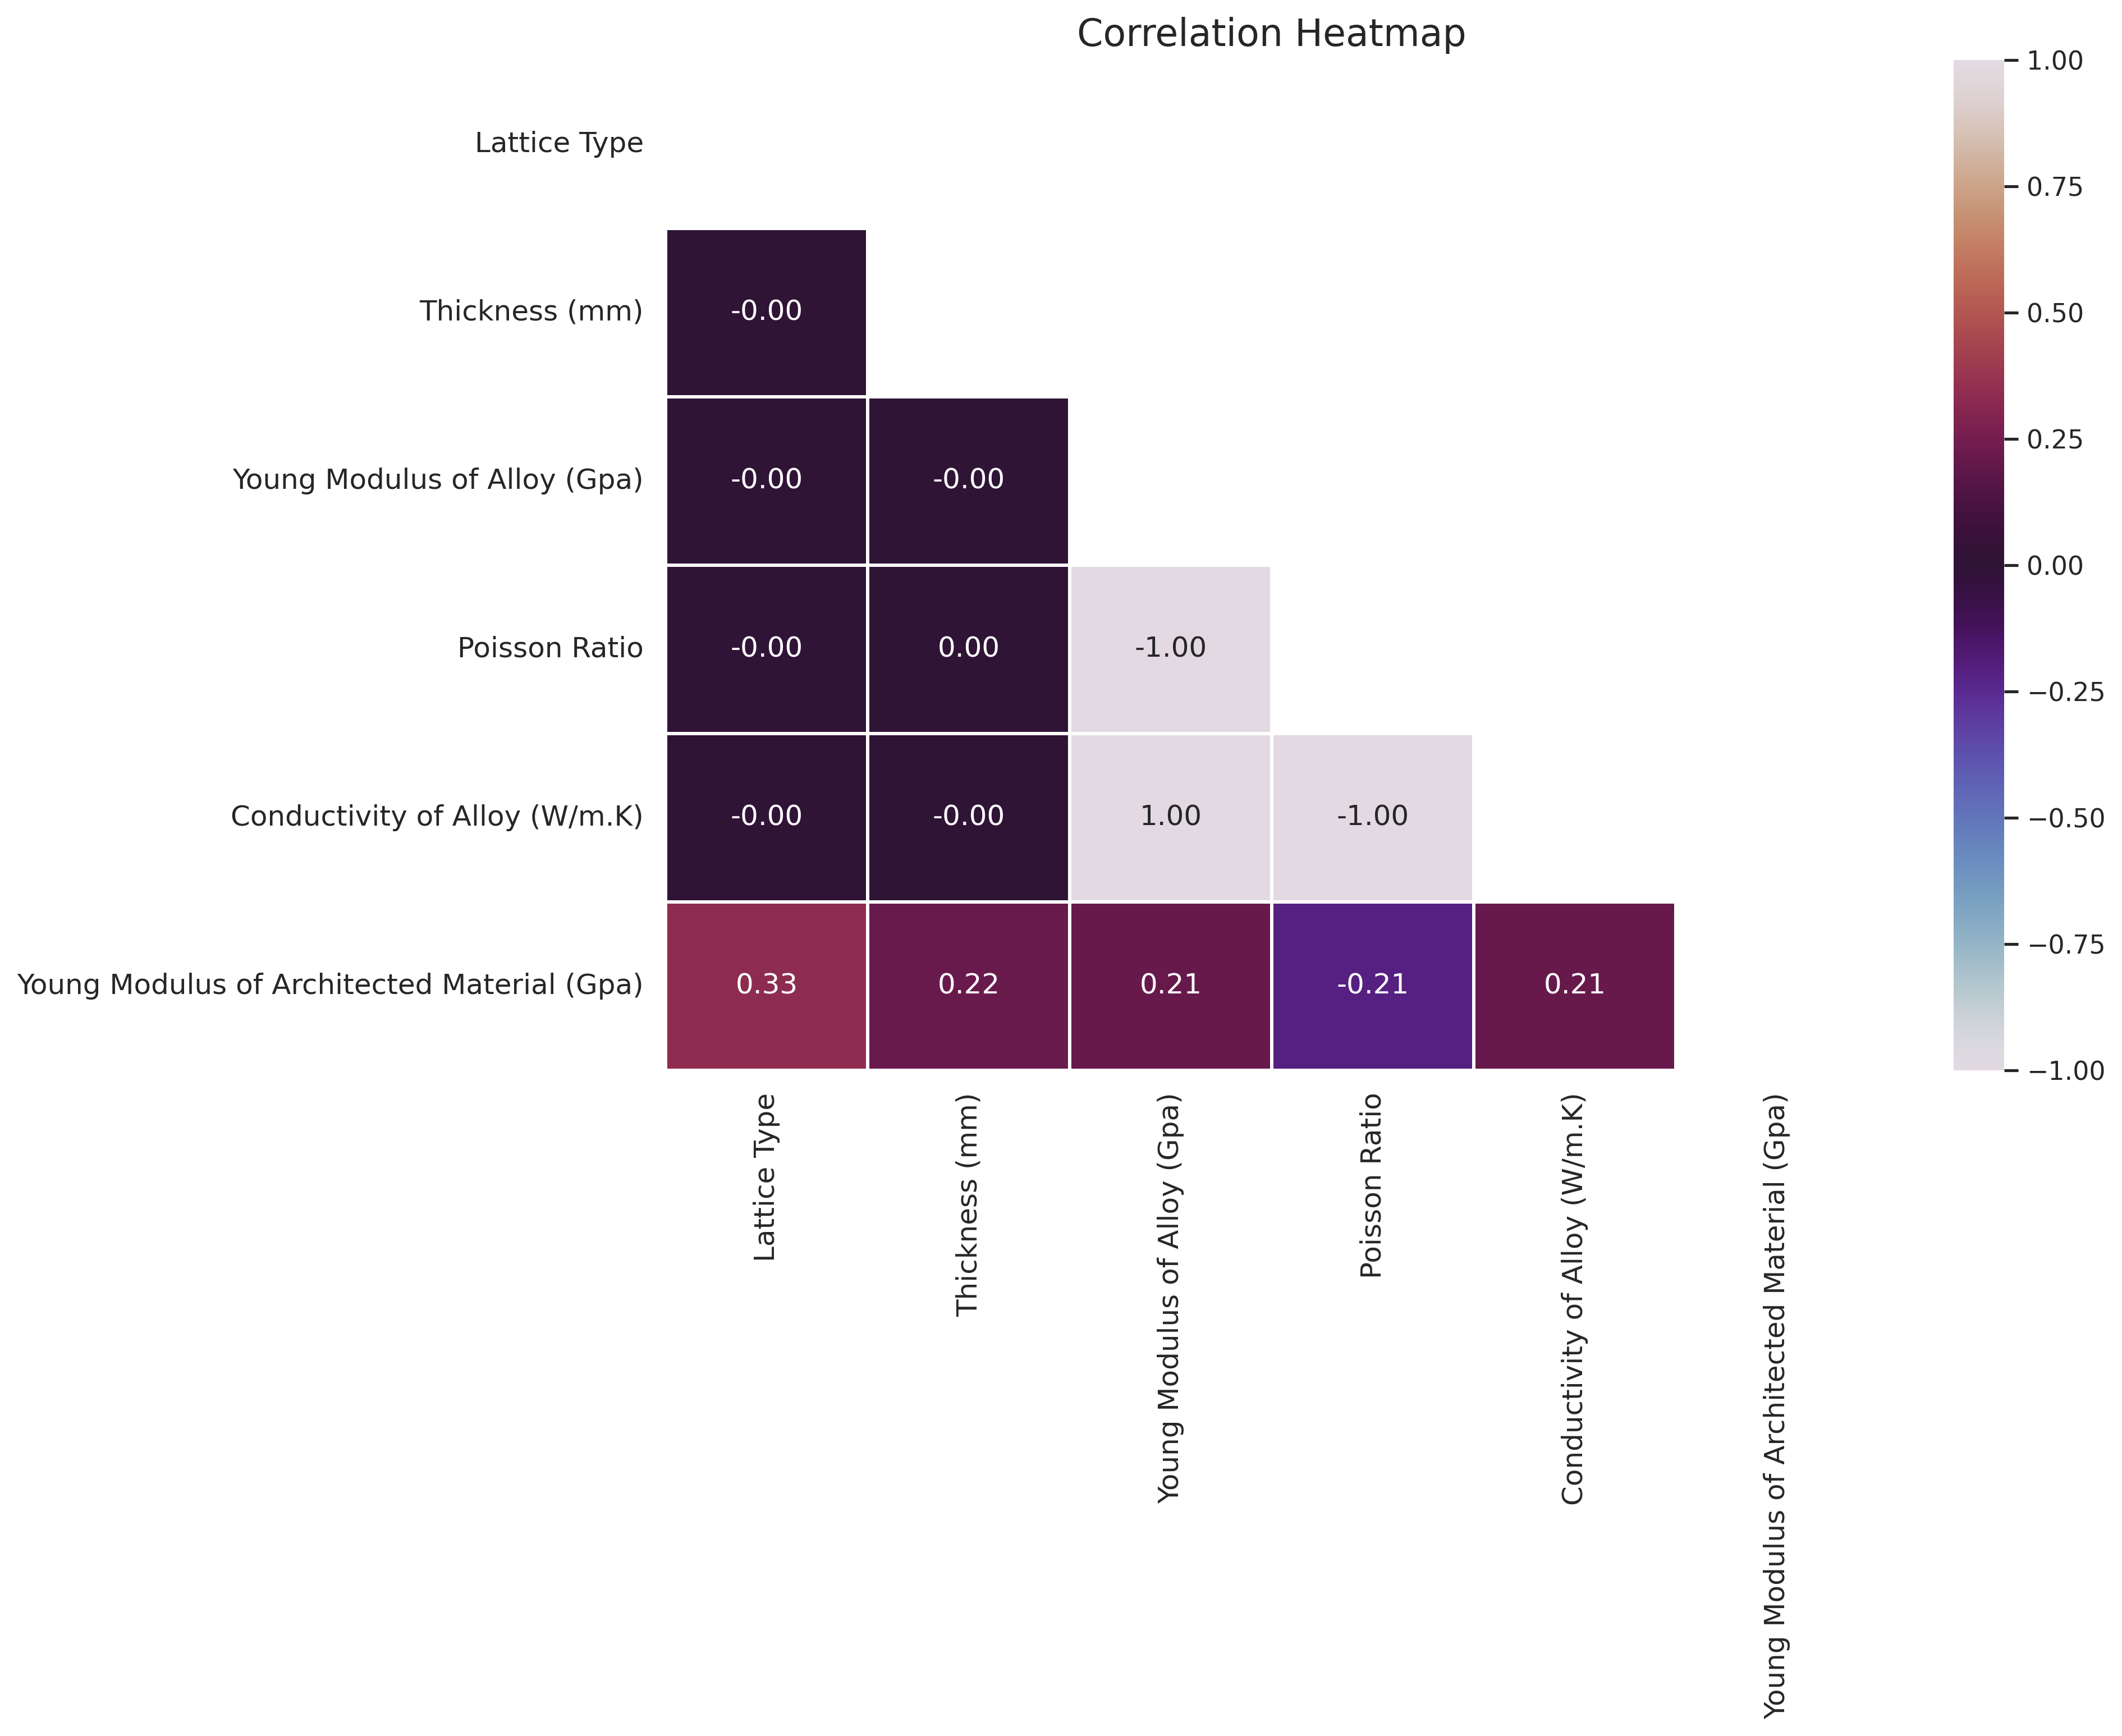

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style of the plot
sns.set(style="white")

# Create a figure with a higher DPI
plt.figure(figsize=(12, 8), dpi=300)

# Compute the correlation matrix
corr = df.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create the heatmap using the "twilight" colormap
sns.heatmap(corr, mask=mask, cmap='twilight', linewidths=1, annot=True, fmt=".2f", cbar=True)

# Customize fonts and labels
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add space between the heatmap and the axis labels
plt.subplots_adjust(left=0.15, right=0.9, top=0.9, bottom=0.15)

# Show the plot
plt.show()


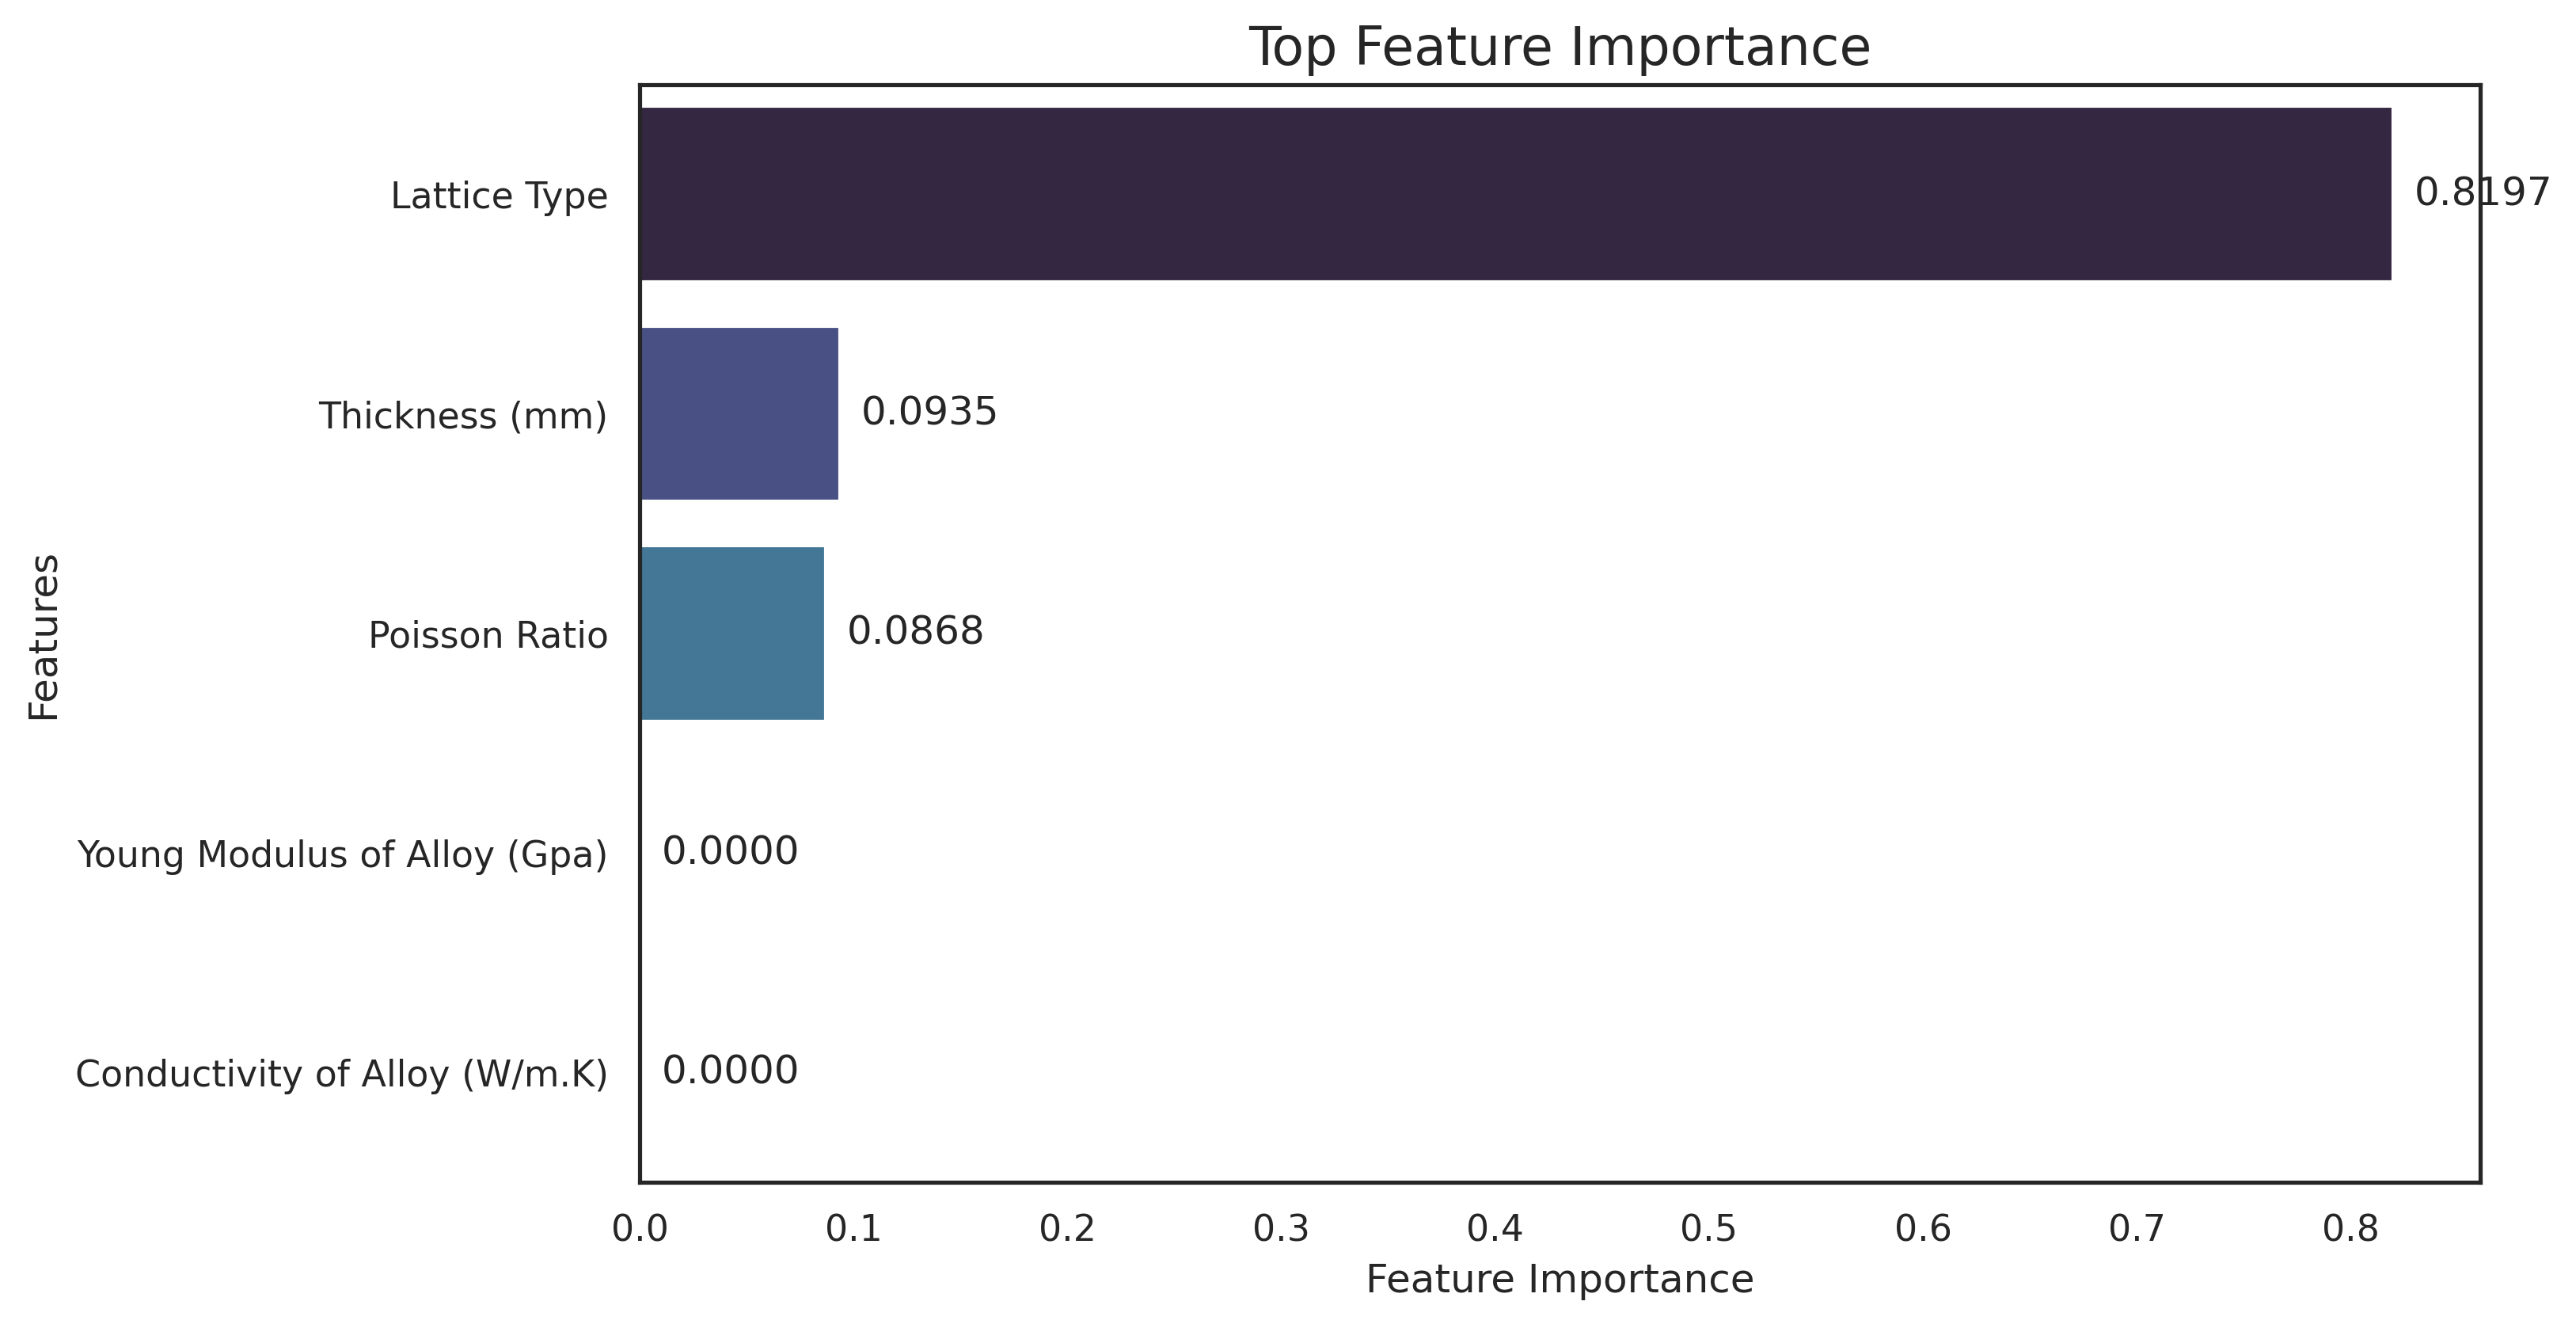

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns

# Set random seed for reproducibility
random_seed = 42
# Create the decision tree regressor
x = df.drop('Young Modulus of Architected Material (Gpa)', axis=1).copy()
y = df["Young Modulus of Architected Material (Gpa)"]
dt = DecisionTreeRegressor(max_depth=3, random_state=random_seed) # Setting random seed here
dt.fit(x, y)

# Create a DataFrame to hold feature importances
dt_feat = pd.DataFrame(dt.feature_importances_, index=x.columns, columns=['feat_importance'])

# Sort the features by importance and select the top 8
top_features = dt_feat.sort_values(by='feat_importance', ascending=False).head(8)

# Create a colorful horizontal bar plot
plt.figure(figsize=(10, 6), dpi=300)
ax = sns.barplot(x='feat_importance', y=top_features.index, data=top_features, palette='mako')  # Using the 'mako' palette

# Add annotations for feature importance scores
for p in ax.patches:
    ax.annotate(f"{p.get_width():.4f}", ((p.get_width() + 0.01), p.get_y() + p.get_height()/2), ha='left', va='center')

plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top Feature Importance', fontsize=16)

# Customize the color palette and style
sns.set(style="whitegrid")

# Show the plot
plt.show()


In [72]:
# creating features and label
df = df.drop(columns = ['Young Modulus of Alloy (Gpa)', 'Conductivity of Alloy (W/m.K)'])

In [73]:
X = df.drop('Young Modulus of Architected Material (Gpa)', axis = 1)
y = df['Young Modulus of Architected Material (Gpa)']

In [74]:
#Splitting data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [75]:

#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() #Standardize features by removing the mean and scaling to unit variance
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [76]:
#Model Building

from sklearn import metrics
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

In [77]:
results = pd.DataFrame( columns = ['Model', 'Mean Squared Error', 'Mean Absolute Error', 'R Squared Error'])

Linear Regression

In [78]:
from sklearn.linear_model import LinearRegression
import time

# Start measuring execution time
start_time = time.time()

classifier = LinearRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# End measuring execution time
end_time = time.time()
execution_time = end_time - start_time

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R Squared Error:", r2)
print("Execution Time:", execution_time, "seconds")

model_results = pd.DataFrame([['Linear Regression', mse, mae, r2, execution_time]],
               columns = ['Model', 'Mean Squared Error', 'Mean Absolute Error', 'R Squared Error', 'Execution Time'])

results = results.append(model_results, ignore_index=True)

Mean Squared Error: 175.8694698143784
Mean Absolute Error: 10.678008615179817
R Squared Error: 0.2186569979749553
Execution Time: 0.010536432266235352 seconds


In [80]:
import shap


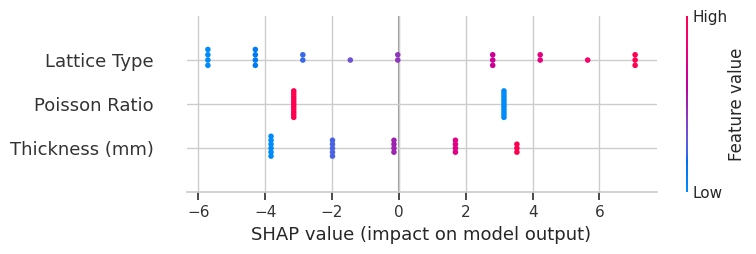

In [81]:
# Use SHAP for model interpretation
explainer = shap.Explainer(classifier, X_train)
shap_values = explainer.shap_values(X_test)

# Visualize SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

In [84]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=010c4b2f52af667cb951ed9e046ad5869d0537011b7012d8c71bca6d11038cab
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [86]:
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, mode="regression")
i = 0  # Example instance index
exp = explainer.explain_instance(X_test.values[i], classifier.predict, num_features=len(X_test.columns))

# Create a plot with higher resolution
plt.figure(dpi=300)

# Show the explanation with table
exp.show_in_notebook(show_table=True)

# Display the plot
plt.show()


<Figure size 1920x1440 with 0 Axes>

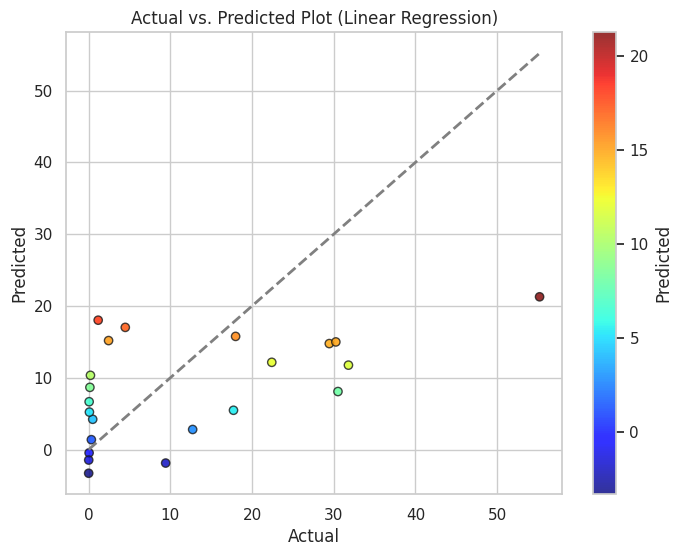

In [21]:

import matplotlib.pyplot as plt
import numpy as np

# Sample actual and predicted values
actual = y_test  # Replace with your actual test data
predicted = y_pred  # Replace with your predicted values

# Create a scatter plot of actual vs. predicted values with a jet colormap
plt.figure(figsize=(8, 6))
sc = plt.scatter(actual, predicted, c=predicted, cmap='jet', marker='o', edgecolors='k', alpha=0.8)
plt.colorbar(sc, label='Predicted', orientation='vertical')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Plot (Linear Regression)')
plt.grid(True)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], linestyle='--', color='gray', lw=2)

plt.show()

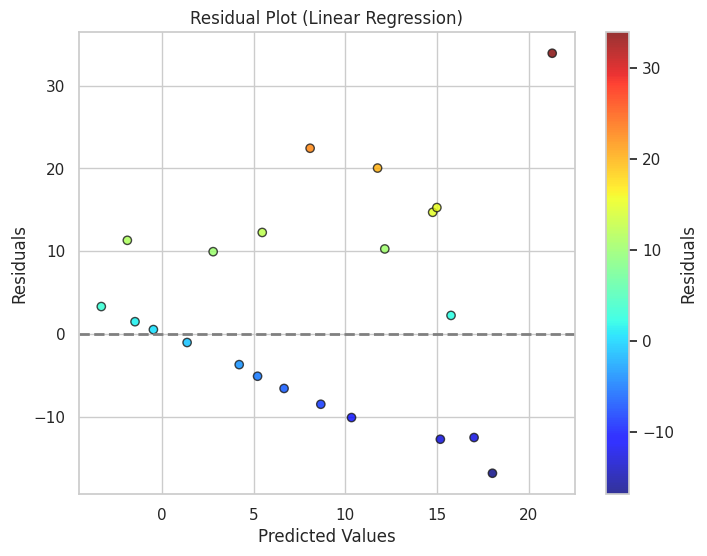

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate residuals
residuals = y_test - y_pred  # Replace with your actual test data and predicted values

# Create a residual plot using a jet colormap
plt.figure(figsize=(8, 6))
sc = plt.scatter(y_pred, residuals, c=residuals, cmap='jet', marker='o', edgecolors='k', alpha=0.8)
plt.colorbar(sc, label='Residuals', orientation='vertical')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Linear Regression)')
plt.axhline(y=0, color='gray', linestyle='--', lw=2)

plt.show()

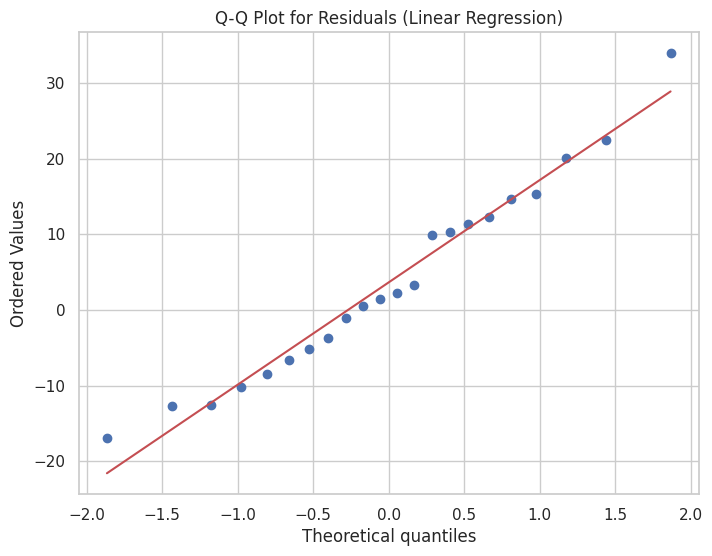

In [23]:

import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate residuals
residuals = y_test - y_pred  # Replace with your actual test data and predicted values

# Create a Q-Q plot for residuals
plt.figure(figsize=(8, 6))
res = stats.probplot(residuals, plot=plt, fit=True, dist='norm')
plt.title('Q-Q Plot for Residuals (Linear Regression)')

plt.show()

Support Vector Regression

In [87]:
from sklearn.svm import SVR
import time

# Start measuring execution time
start_time = time.time()

classifier = SVR(kernel='rbf')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# End measuring execution time
end_time = time.time()
execution_time = end_time - start_time

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R Squared Error:", r2)
print("Execution Time:", execution_time, "seconds")

model_results = pd.DataFrame([['Support Vector Regression', mse, mae, r2, execution_time]],
               columns=['Model', 'Mean Squared Error', 'Mean Absolute Error', 'R Squared Error', 'Execution Time'])

results = results.append(model_results, ignore_index=True)

Mean Squared Error: 319.59210930003036
Mean Absolute Error: 11.19608330429808
R Squared Error: -0.4198658719308115
Execution Time: 0.011126279830932617 seconds


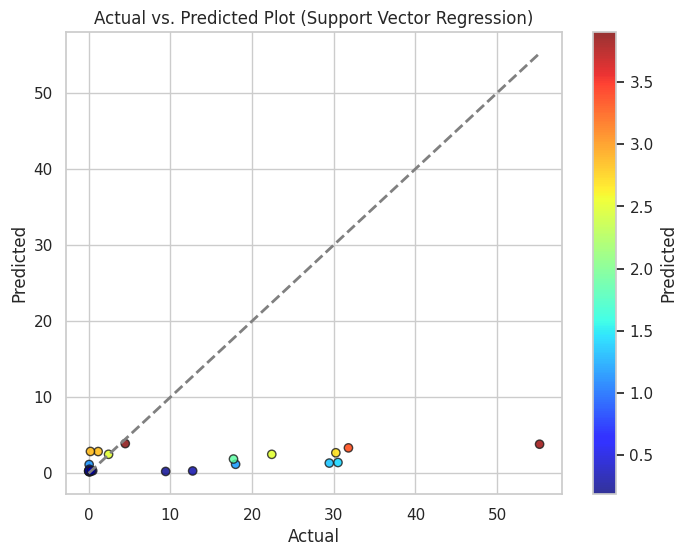

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Sample actual and predicted values
actual = y_test  # Replace with your actual test data
predicted = y_pred  # Replace with your predicted values

# Create a scatter plot of actual vs. predicted values with a jet colormap
plt.figure(figsize=(8, 6))
sc = plt.scatter(actual, predicted, c=predicted, cmap='jet', marker='o', edgecolors='k', alpha=0.8)
plt.colorbar(sc, label='Predicted', orientation='vertical')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Plot (Support Vector Regression)')
plt.grid(True)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], linestyle='--', color='gray', lw=2)

plt.show()

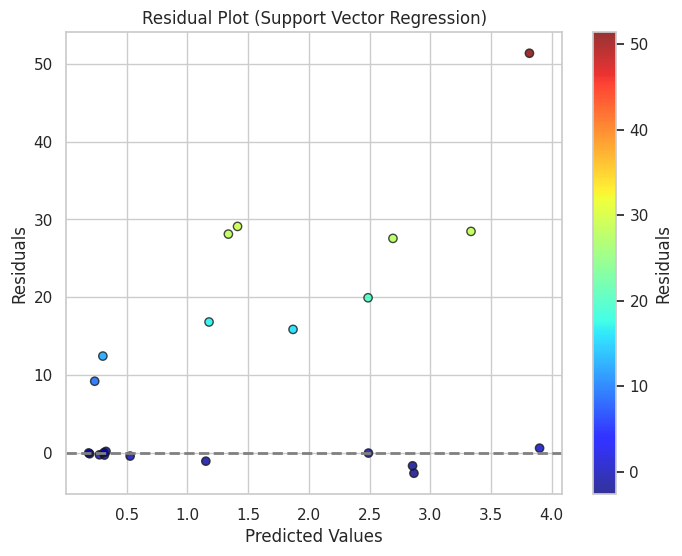

In [26]:

import matplotlib.pyplot as plt
import numpy as np

# Calculate residuals
residuals = y_test - y_pred  # Replace with your actual test data and predicted values

# Create a residual plot using a jet colormap
plt.figure(figsize=(8, 6))
sc = plt.scatter(y_pred, residuals, c=residuals, cmap='jet', marker='o', edgecolors='k', alpha=0.8)
plt.colorbar(sc, label='Residuals', orientation='vertical')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Support Vector Regression)')
plt.axhline(y=0, color='gray', linestyle='--', lw=2)

plt.show()

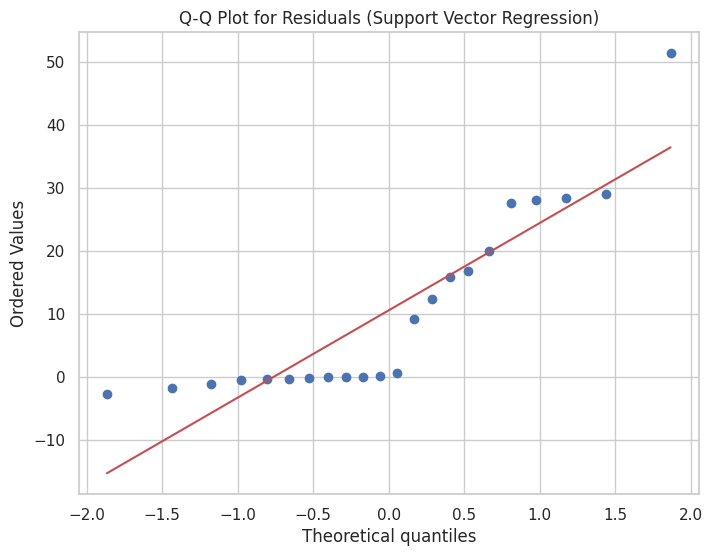

In [27]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate residuals
residuals = y_test - y_pred  # Replace with your actual test data and predicted values

# Create a Q-Q plot for residuals
plt.figure(figsize=(8, 6))
res = stats.probplot(residuals, plot=plt, fit=True, dist='norm')
plt.title('Q-Q Plot for Residuals (Support Vector Regression)')

plt.show()

Decision Tree

In [89]:

from sklearn.tree import DecisionTreeRegressor
import time

# Start measuring execution time
start_time = time.time()

classifier = DecisionTreeRegressor()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# End measuring execution time
end_time = time.time()
execution_time = end_time - start_time

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R Squared Error:", r2)
print("Execution Time:", execution_time, "seconds")

model_results = pd.DataFrame([['Decision Tree', mse, mae, r2, execution_time]],
               columns=['Model', 'Mean Squared Error', 'Mean Absolute Error', 'R Squared Error', 'Execution Time'])

results = results.append(model_results, ignore_index=True)

Mean Squared Error: 37.50613176199633
Mean Absolute Error: 3.1171590621363645
R Squared Error: 0.8333698645012392
Execution Time: 0.008154869079589844 seconds


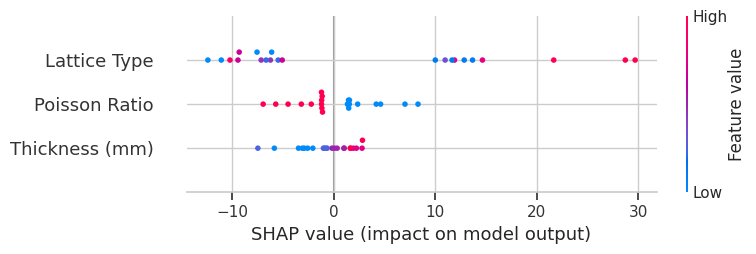

In [90]:
# Use SHAP for model interpretation
explainer = shap.Explainer(classifier, X_train)
shap_values = explainer.shap_values(X_test)

# Visualize SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

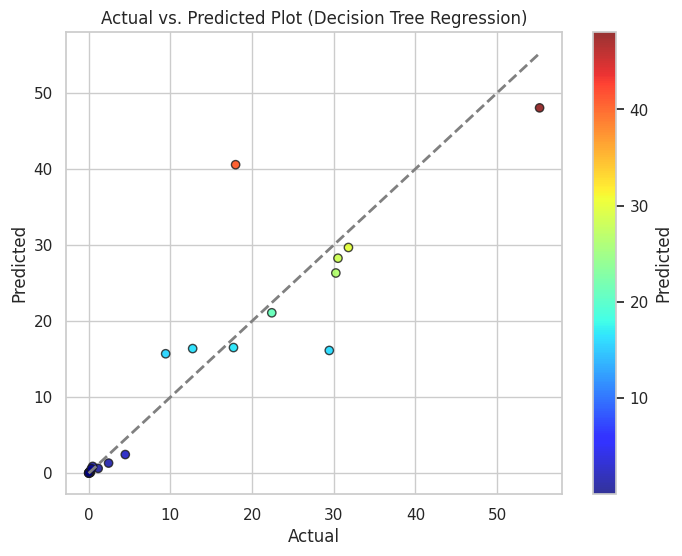

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Sample actual and predicted values
actual = y_test  # Replace with your actual test data
predicted = y_pred  # Replace with your predicted values

# Create a scatter plot of actual vs. predicted values with a jet colormap
plt.figure(figsize=(8, 6))
sc = plt.scatter(actual, predicted, c=predicted, cmap='jet', marker='o', edgecolors='k', alpha=0.8)
plt.colorbar(sc, label='Predicted', orientation='vertical')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Plot (Decision Tree Regression)')
plt.grid(True)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], linestyle='--', color='gray', lw=2)

plt.show()

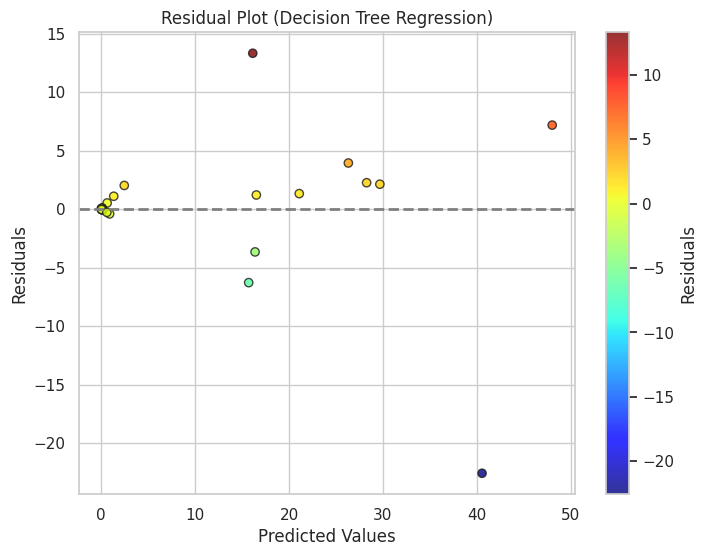

In [30]:

import matplotlib.pyplot as plt
import numpy as np

# Calculate residuals
residuals = y_test - y_pred  # Replace with your actual test data and predicted values

# Create a residual plot using a jet colormap
plt.figure(figsize=(8, 6))
sc = plt.scatter(y_pred, residuals, c=residuals, cmap='jet', marker='o', edgecolors='k', alpha=0.8)
plt.colorbar(sc, label='Residuals', orientation='vertical')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Decision Tree Regression)')
plt.axhline(y=0, color='gray', linestyle='--', lw=2)

plt.show()

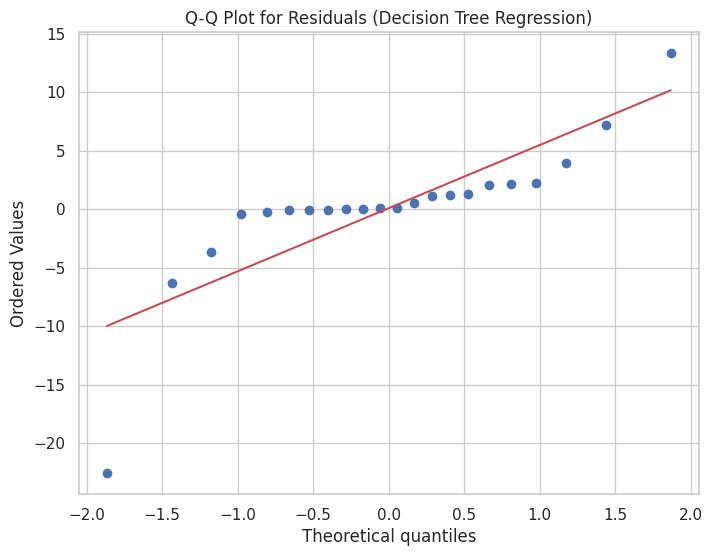

In [31]:

import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate residuals
residuals = y_test - y_pred  # Replace with your actual test data and predicted values

# Create a Q-Q plot for residuals
plt.figure(figsize=(8, 6))
res = stats.probplot(residuals, plot=plt, fit=True, dist='norm')
plt.title('Q-Q Plot for Residuals (Decision Tree Regression)')

plt.show()

In [33]:
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [34]:
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X, y)

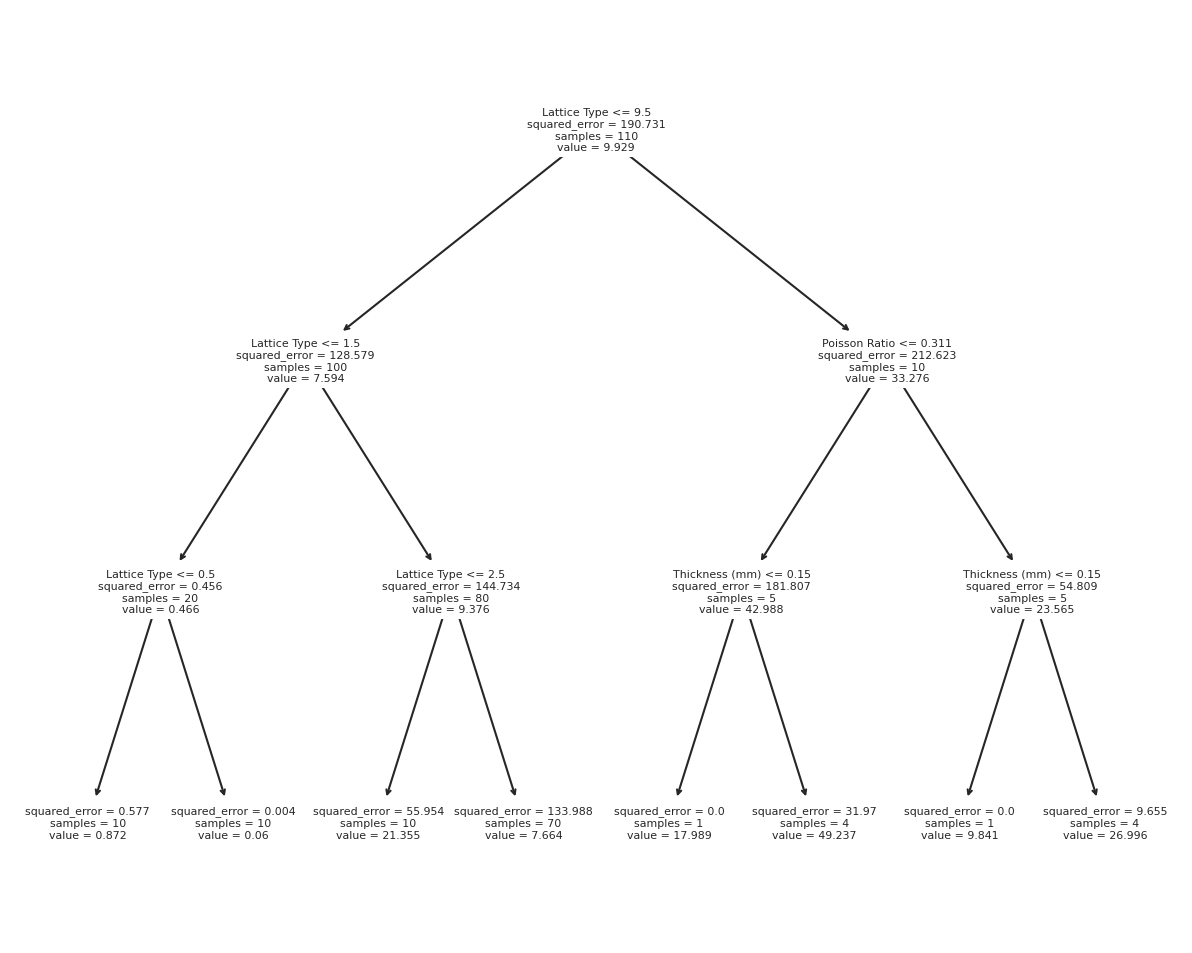

In [35]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model, feature_names=X.columns);

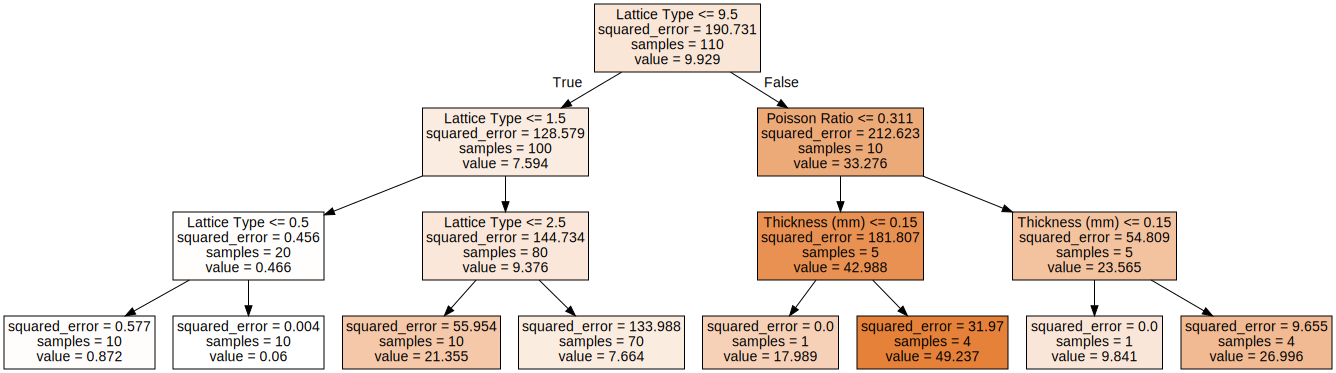

In [36]:
import graphviz
dot_data = tree.export_graphviz(regr, out_file=None,
                                feature_names=X.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

Random Forest

In [91]:
from sklearn.ensemble import RandomForestRegressor
import time

# Start measuring execution time
start_time = time.time()

classifier = RandomForestRegressor(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# End measuring execution time
end_time = time.time()
execution_time = end_time - start_time

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R Squared Error:", r2)
print("Execution Time:", execution_time, "seconds")

model_results = pd.DataFrame([['Random Forest', mse, mae, r2, execution_time]],
               columns=['Model', 'Mean Squared Error', 'Mean Absolute Error', 'R Squared Error', 'Execution Time'])

results = results.append(model_results, ignore_index=True)

Mean Squared Error: 25.561752204818607
Mean Absolute Error: 2.9832432438090892
R Squared Error: 0.8864356830903438
Execution Time: 0.09586668014526367 seconds


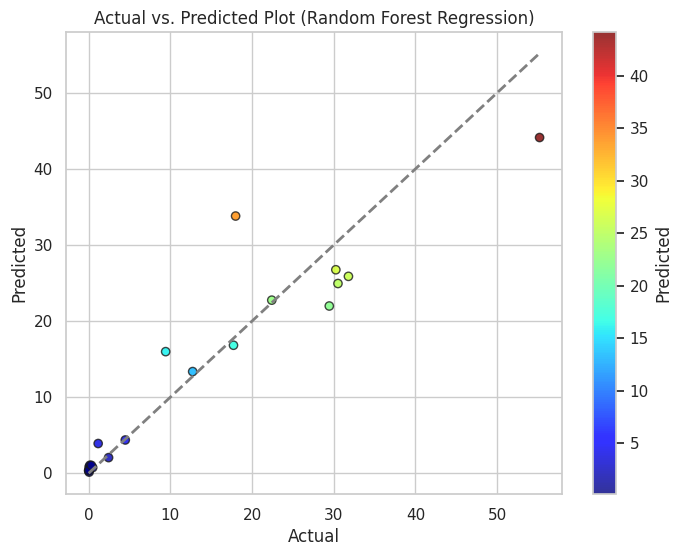

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Sample actual and predicted values
actual = y_test  # Replace with your actual test data
predicted = y_pred  # Replace with your predicted values

# Create a scatter plot of actual vs. predicted values with a jet colormap
plt.figure(figsize=(8, 6))
sc = plt.scatter(actual, predicted, c=predicted, cmap='jet', marker='o', edgecolors='k', alpha=0.8)
plt.colorbar(sc, label='Predicted', orientation='vertical')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Plot (Random Forest Regression)')
plt.grid(True)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], linestyle='--', color='gray', lw=2)

plt.show()

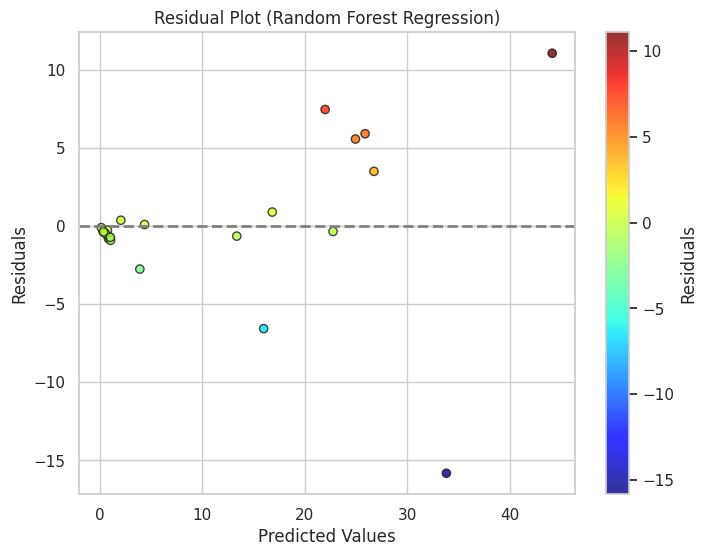

In [39]:

import matplotlib.pyplot as plt
import numpy as np

# Calculate residuals
residuals = y_test - y_pred  # Replace with your actual test data and predicted values

# Create a residual plot using a jet colormap
plt.figure(figsize=(8, 6))
sc = plt.scatter(y_pred, residuals, c=residuals, cmap='jet', marker='o', edgecolors='k', alpha=0.8)
plt.colorbar(sc, label='Residuals', orientation='vertical')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Random Forest Regression)')
plt.axhline(y=0, color='gray', linestyle='--', lw=2)

plt.show()

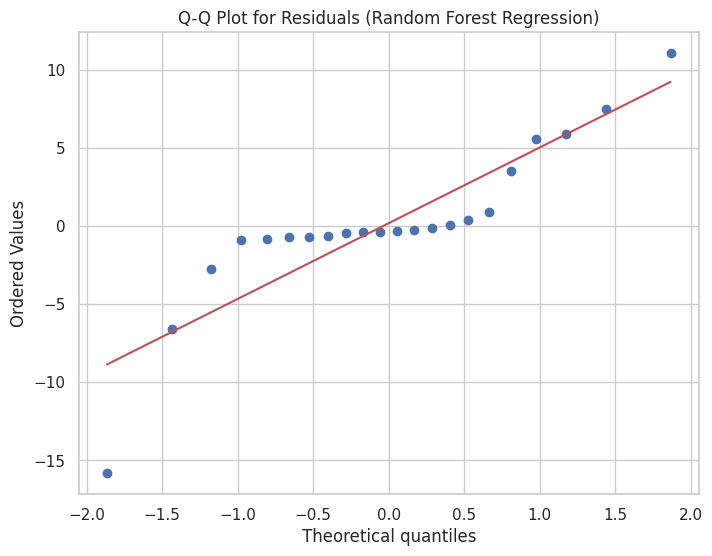

In [40]:

import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate residuals
residuals = y_test - y_pred  # Replace with your actual test data and predicted values

# Create a Q-Q plot for residuals
plt.figure(figsize=(8, 6))
res = stats.probplot(residuals, plot=plt, fit=True, dist='norm')
plt.title('Q-Q Plot for Residuals (Random Forest Regression)')

plt.show()

XG Boost

In [93]:
import xgboost as xg
import time

# Start measuring execution time
start_time = time.time()

classifier = xg.XGBRegressor()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# End measuring execution time
end_time = time.time()
execution_time = end_time - start_time

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R Squared Error:", r2)
print("Execution Time:", execution_time, "seconds")

model_results = pd.DataFrame([['XG Boost', mse, mae, r2, execution_time]],
               columns=['Model', 'Mean Squared Error', 'Mean Absolute Error', 'R Squared Error', 'Execution Time'])

results = results.append(model_results, ignore_index=True)

Mean Squared Error: 2.7993053872142886
Mean Absolute Error: 1.1521021842024117
R Squared Error: 0.9875634032607286
Execution Time: 0.0376133918762207 seconds


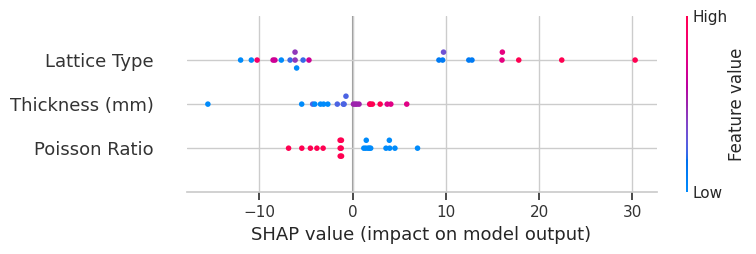

In [94]:
# Use SHAP for model interpretation
explainer = shap.Explainer(classifier, X_train)
shap_values = explainer.shap_values(X_test)

# Visualize SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

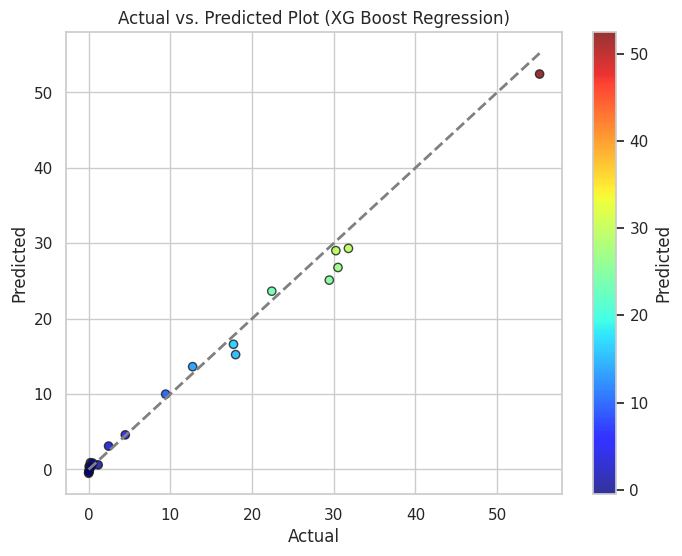

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Sample actual and predicted values
actual = y_test  # Replace with your actual test data
predicted = y_pred  # Replace with your predicted values

# Create a scatter plot of actual vs. predicted values with a jet colormap
plt.figure(figsize=(8, 6))
sc = plt.scatter(actual, predicted, c=predicted, cmap='jet', marker='o', edgecolors='k', alpha=0.8)
plt.colorbar(sc, label='Predicted', orientation='vertical')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Plot (XG Boost Regression)')
plt.grid(True)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], linestyle='--', color='gray', lw=2)

plt.show()

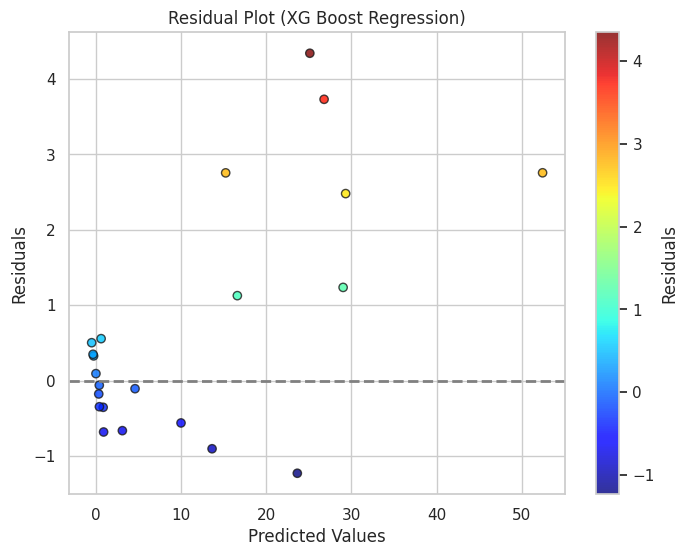

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate residuals
residuals = y_test - y_pred  # Replace with your actual test data and predicted values

# Create a residual plot using a jet colormap
plt.figure(figsize=(8, 6))
sc = plt.scatter(y_pred, residuals, c=residuals, cmap='jet', marker='o', edgecolors='k', alpha=0.8)
plt.colorbar(sc, label='Residuals', orientation='vertical')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (XG Boost Regression)')
plt.axhline(y=0, color='gray', linestyle='--', lw=2)

plt.show()

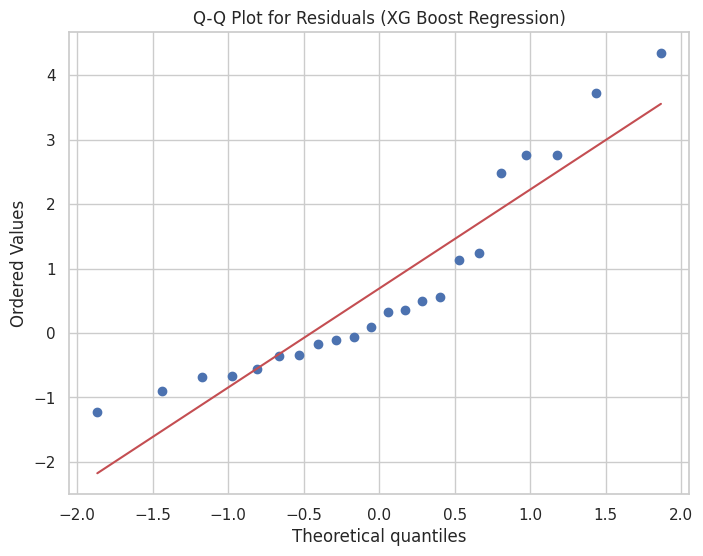

In [44]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate residuals
residuals = y_test - y_pred  # Replace with your actual test data and predicted values

# Create a Q-Q plot for residuals
plt.figure(figsize=(8, 6))
res = stats.probplot(residuals, plot=plt, fit=True, dist='norm')
plt.title('Q-Q Plot for Residuals (XG Boost Regression)')

plt.show()

Catboost

In [95]:
!pip install catboost
import catboost as cb
import time

# Start measuring execution time
start_time = time.time()

classifier = cb.CatBoostRegressor(loss_function='RMSE')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# End measuring execution time
end_time = time.time()
execution_time = end_time - start_time

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R Squared Error:", r2)
print("Execution Time:", execution_time, "seconds")

model_results = pd.DataFrame([['CatBoost', mse, mae, r2, execution_time]],
               columns=['Model', 'Mean Squared Error', 'Mean Absolute Error', 'R Squared Error', 'Execution Time'])

results = results.append(model_results, ignore_index=True)

Learning rate set to 0.027887
0:	learn: 13.3650354	total: 1.51ms	remaining: 1.51s
1:	learn: 13.2927163	total: 2.99ms	remaining: 1.49s
2:	learn: 13.1839230	total: 3.54ms	remaining: 1.18s
3:	learn: 13.0982085	total: 3.87ms	remaining: 964ms
4:	learn: 13.0183609	total: 4.08ms	remaining: 812ms
5:	learn: 12.9169902	total: 4.32ms	remaining: 716ms
6:	learn: 12.8521891	total: 4.67ms	remaining: 663ms
7:	learn: 12.7955035	total: 4.97ms	remaining: 616ms
8:	learn: 12.7138372	total: 5.43ms	remaining: 598ms
9:	learn: 12.6463815	total: 5.63ms	remaining: 557ms
10:	learn: 12.5680679	total: 5.9ms	remaining: 530ms
11:	learn: 12.4655132	total: 6.22ms	remaining: 512ms
12:	learn: 12.3924374	total: 6.42ms	remaining: 487ms
13:	learn: 12.2838025	total: 6.99ms	remaining: 492ms
14:	learn: 12.1713630	total: 7.1ms	remaining: 466ms
15:	learn: 12.1095899	total: 7.2ms	remaining: 443ms
16:	learn: 12.0651246	total: 7.3ms	remaining: 422ms
17:	learn: 11.9995496	total: 7.41ms	remaining: 404ms
18:	learn: 11.9745254	total: 7

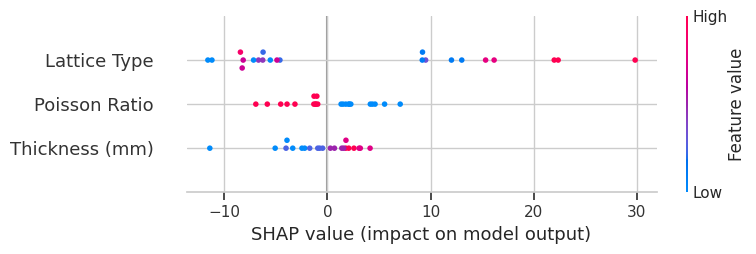

In [96]:
# Use SHAP for model interpretation
explainer = shap.Explainer(classifier, X_train)
shap_values = explainer.shap_values(X_test)

# Visualize SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

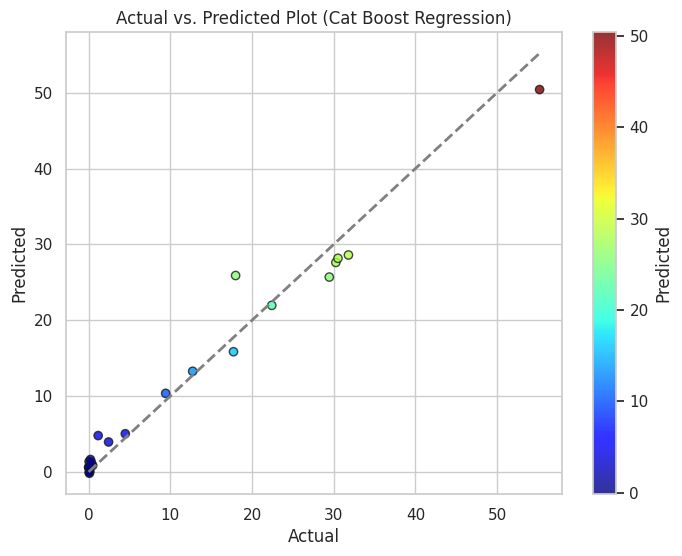

In [46]:

import matplotlib.pyplot as plt
import numpy as np

# Sample actual and predicted values
actual = y_test  # Replace with your actual test data
predicted = y_pred  # Replace with your predicted values

# Create a scatter plot of actual vs. predicted values with a jet colormap
plt.figure(figsize=(8, 6))
sc = plt.scatter(actual, predicted, c=predicted, cmap='jet', marker='o', edgecolors='k', alpha=0.8)
plt.colorbar(sc, label='Predicted', orientation='vertical')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Plot (Cat Boost Regression)')
plt.grid(True)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], linestyle='--', color='gray', lw=2)

plt.show()

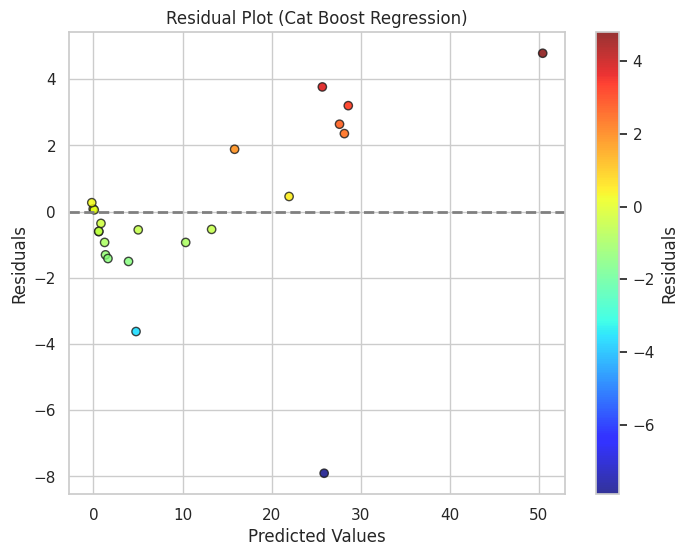

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate residuals
residuals = y_test - y_pred  # Replace with your actual test data and predicted values

# Create a residual plot using a jet colormap
plt.figure(figsize=(8, 6))
sc = plt.scatter(y_pred, residuals, c=residuals, cmap='jet', marker='o', edgecolors='k', alpha=0.8)
plt.colorbar(sc, label='Residuals', orientation='vertical')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Cat Boost Regression)')
plt.axhline(y=0, color='gray', linestyle='--', lw=2)

plt.show()

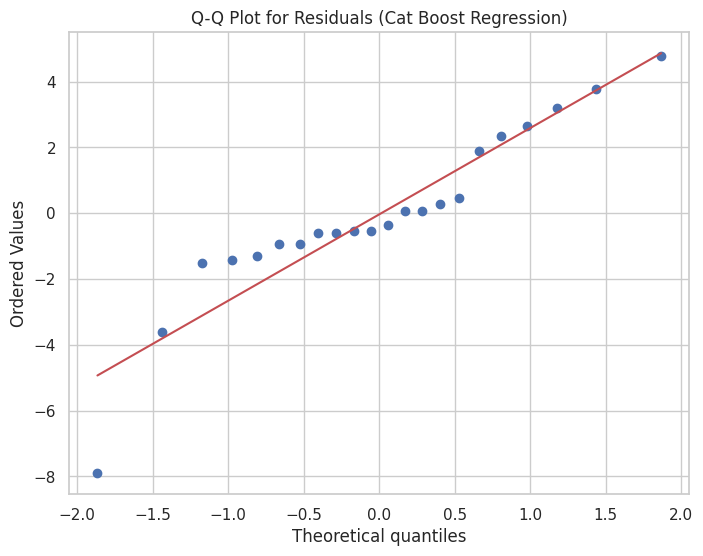

In [48]:

import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate residuals
residuals = y_test - y_pred  # Replace with your actual test data and predicted values

# Create a Q-Q plot for residuals
plt.figure(figsize=(8, 6))
res = stats.probplot(residuals, plot=plt, fit=True, dist='norm')
plt.title('Q-Q Plot for Residuals (Cat Boost Regression)')

plt.show()


Ada Boost

In [97]:

from sklearn.ensemble import AdaBoostRegressor
import time

# Start measuring execution time
start_time = time.time()

classifier = AdaBoostRegressor()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# End measuring execution time
end_time = time.time()
execution_time = end_time - start_time

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R Squared Error:", r2)
print("Execution Time:", execution_time, "seconds")

model_results = pd.DataFrame([['AdaBoost', mse, mae, r2, execution_time]],
               columns=['Model', 'Mean Squared Error', 'Mean Absolute Error', 'R Squared Error', 'Execution Time'])

results = results.append(model_results, ignore_index=True)

Mean Squared Error: 62.80084828996706
Mean Absolute Error: 6.409184173084596
R Squared Error: 0.7209919186974738
Execution Time: 0.06002330780029297 seconds


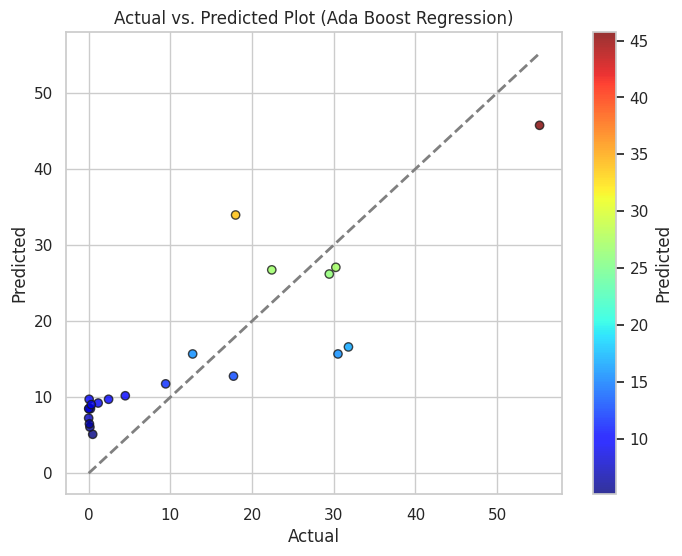

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Sample actual and predicted values
actual = y_test  # Replace with your actual test data
predicted = y_pred  # Replace with your predicted values

# Create a scatter plot of actual vs. predicted values with a jet colormap
plt.figure(figsize=(8, 6))
sc = plt.scatter(actual, predicted, c=predicted, cmap='jet', marker='o', edgecolors='k', alpha=0.8)
plt.colorbar(sc, label='Predicted', orientation='vertical')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Plot (Ada Boost Regression)')
plt.grid(True)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], linestyle='--', color='gray', lw=2)

plt.show()

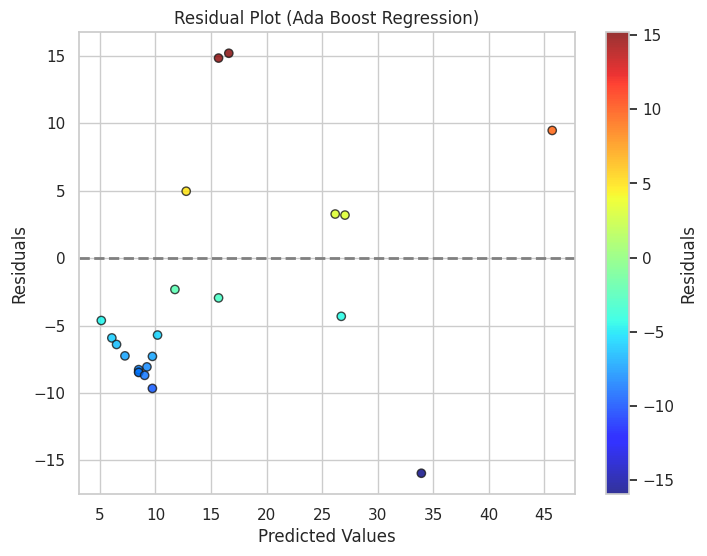

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate residuals
residuals = y_test - y_pred  # Replace with your actual test data and predicted values

# Create a residual plot using a jet colormap
plt.figure(figsize=(8, 6))
sc = plt.scatter(y_pred, residuals, c=residuals, cmap='jet', marker='o', edgecolors='k', alpha=0.8)
plt.colorbar(sc, label='Residuals', orientation='vertical')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Ada Boost Regression)')
plt.axhline(y=0, color='gray', linestyle='--', lw=2)

plt.show()

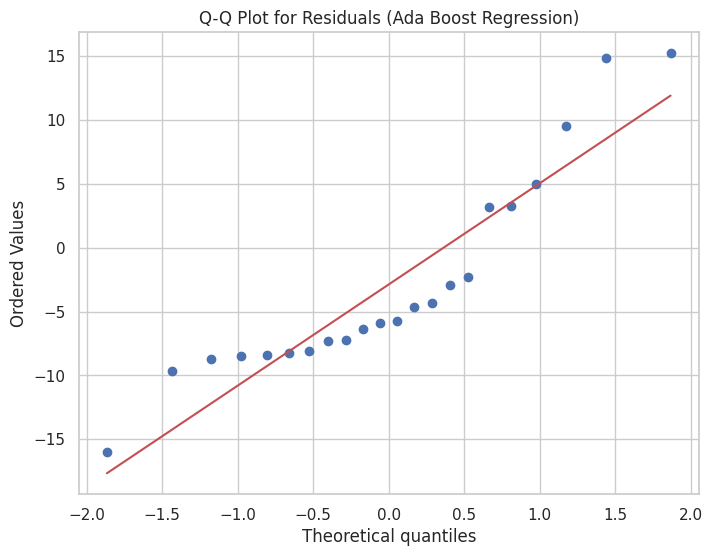

In [52]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate residuals
residuals = y_test - y_pred  # Replace with your actual test data and predicted values

# Create a Q-Q plot for residuals
plt.figure(figsize=(8, 6))
res = stats.probplot(residuals, plot=plt, fit=True, dist='norm')
plt.title('Q-Q Plot for Residuals (Ada Boost Regression)')

plt.show()

Extra Tree Regressor

In [99]:
from sklearn.ensemble import ExtraTreesRegressor
import time

# Start measuring execution time
start_time = time.time()

classifier = ExtraTreesRegressor(n_estimators=10, random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# End measuring execution time
end_time = time.time()
execution_time = end_time - start_time

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R Squared Error:", r2)
print("Execution Time:", execution_time, "seconds")

model_results = pd.DataFrame([['ExtraTree Regressor', mse, mae, r2, execution_time]],
               columns=['Model', 'Mean Squared Error', 'Mean Absolute Error', 'R Squared Error', 'Execution Time'])

results = results.append(model_results, ignore_index=True)

Mean Squared Error: 21.222189819779143
Mean Absolute Error: 2.939955943045455
R Squared Error: 0.9057152471043846
Execution Time: 0.016187429428100586 seconds


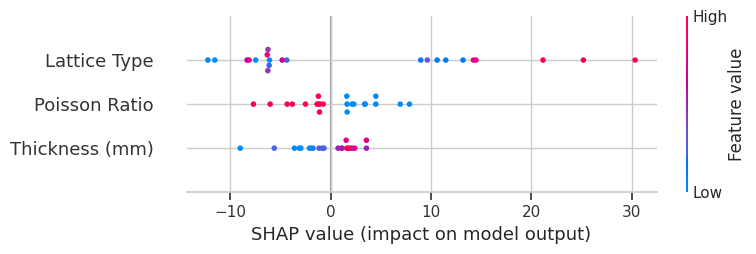

In [100]:
# Use SHAP for model interpretation
explainer = shap.Explainer(classifier, X_train)
shap_values = explainer.shap_values(X_test)

# Visualize SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

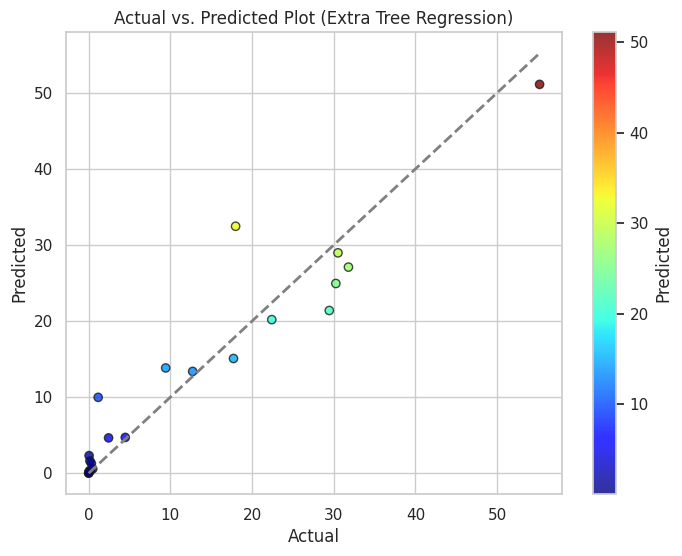

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Sample actual and predicted values
actual = y_test  # Replace with your actual test data
predicted = y_pred  # Replace with your predicted values

# Create a scatter plot of actual vs. predicted values with a jet colormap
plt.figure(figsize=(8, 6))
sc = plt.scatter(actual, predicted, c=predicted, cmap='jet', marker='o', edgecolors='k', alpha=0.8)
plt.colorbar(sc, label='Predicted', orientation='vertical')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Plot (Extra Tree Regression)')
plt.grid(True)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], linestyle='--', color='gray', lw=2)

plt.show()

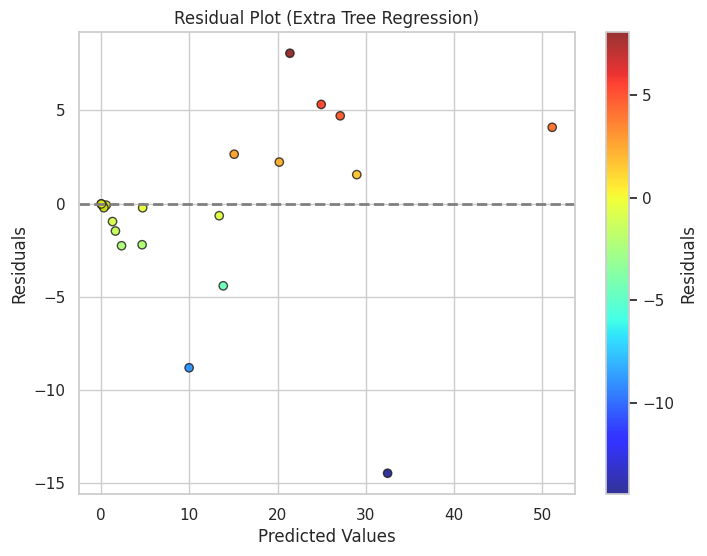

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate residuals
residuals = y_test - y_pred  # Replace with your actual test data and predicted values

# Create a residual plot using a jet colormap
plt.figure(figsize=(8, 6))
sc = plt.scatter(y_pred, residuals, c=residuals, cmap='jet', marker='o', edgecolors='k', alpha=0.8)
plt.colorbar(sc, label='Residuals', orientation='vertical')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Extra Tree Regression)')
plt.axhline(y=0, color='gray', linestyle='--', lw=2)

plt.show()

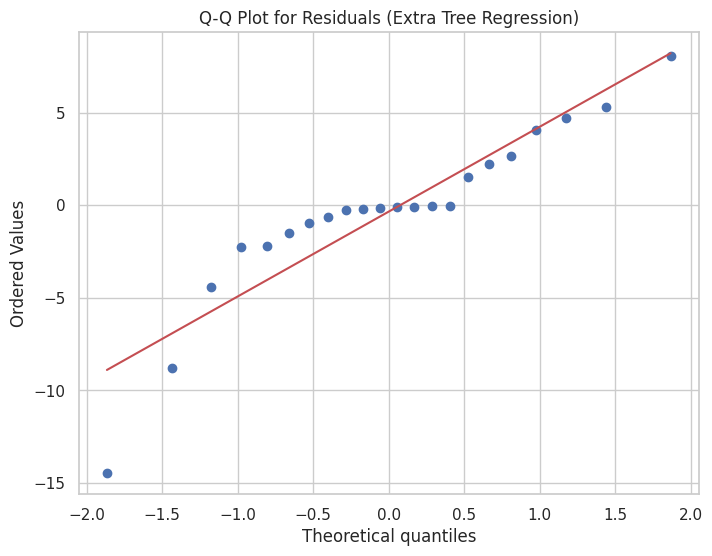

In [57]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate residuals
residuals = y_test - y_pred  # Replace with your actual test data and predicted values

# Create a Q-Q plot for residuals
plt.figure(figsize=(8, 6))
res = stats.probplot(residuals, plot=plt, fit=True, dist='norm')
plt.title('Q-Q Plot for Residuals (Extra Tree Regression)')

plt.show()

Gradient Boosting Regression

In [101]:
from sklearn.ensemble import GradientBoostingRegressor
import time

# Start measuring execution time
start_time = time.time()

classifier = GradientBoostingRegressor(random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# End measuring execution time
end_time = time.time()
execution_time = end_time - start_time

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R Squared Error:", r2)
print("Execution Time:", execution_time, "seconds")

model_results = pd.DataFrame([['Gradient Boosting Regressor', mse, mae, r2, execution_time]],
               columns=['Model', 'Mean Squared Error', 'Mean Absolute Error', 'R Squared Error', 'Execution Time'])

results = results.append(model_results, ignore_index=True)

Mean Squared Error: 27.256667096658646
Mean Absolute Error: 3.4953007683213175
R Squared Error: 0.8789056104110722
Execution Time: 0.04136538505554199 seconds


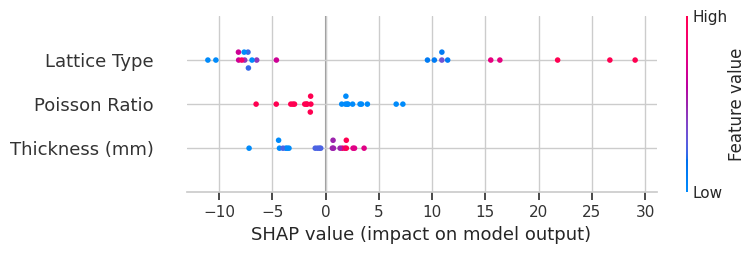

In [102]:
# Use SHAP for model interpretation
explainer = shap.Explainer(classifier, X_train)
shap_values = explainer.shap_values(X_test)

# Visualize SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

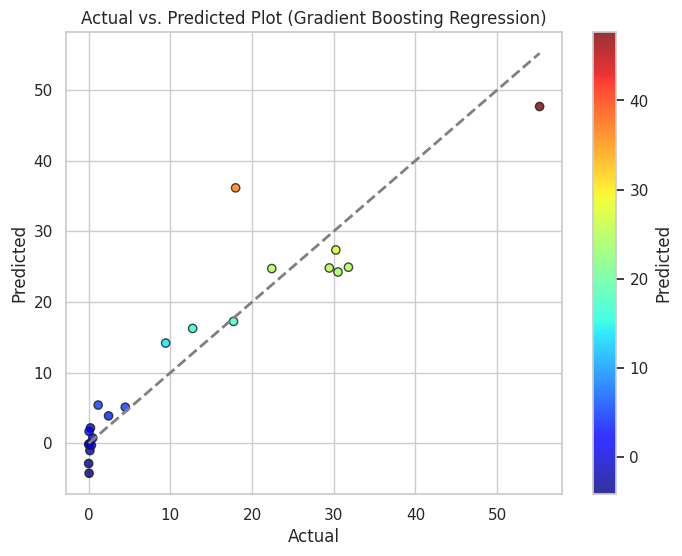

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Sample actual and predicted values
actual = y_test  # Replace with your actual test data
predicted = y_pred  # Replace with your predicted values

# Create a scatter plot of actual vs. predicted values with a jet colormap
plt.figure(figsize=(8, 6))
sc = plt.scatter(actual, predicted, c=predicted, cmap='jet', marker='o', edgecolors='k', alpha=0.8)
plt.colorbar(sc, label='Predicted', orientation='vertical')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Plot (Gradient Boosting Regression)')
plt.grid(True)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], linestyle='--', color='gray', lw=2)

plt.show()

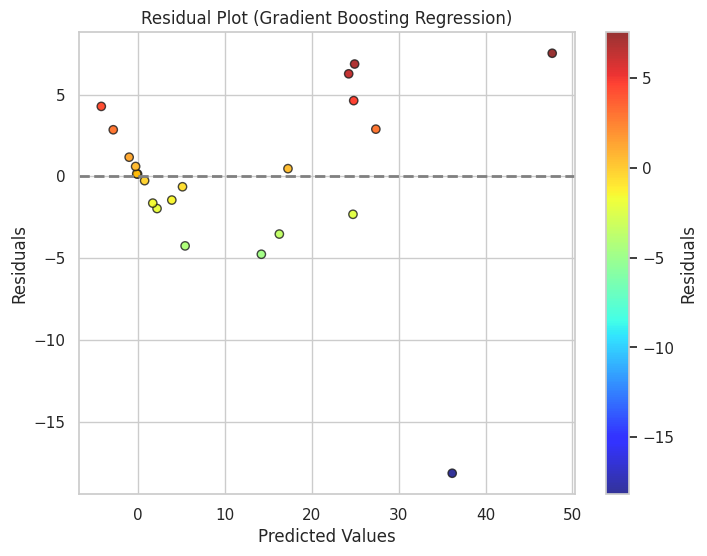

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate residuals
residuals = y_test - y_pred  # Replace with your actual test data and predicted values

# Create a residual plot using a jet colormap
plt.figure(figsize=(8, 6))
sc = plt.scatter(y_pred, residuals, c=residuals, cmap='jet', marker='o', edgecolors='k', alpha=0.8)
plt.colorbar(sc, label='Residuals', orientation='vertical')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Gradient Boosting Regression)')
plt.axhline(y=0, color='gray', linestyle='--', lw=2)

plt.show()

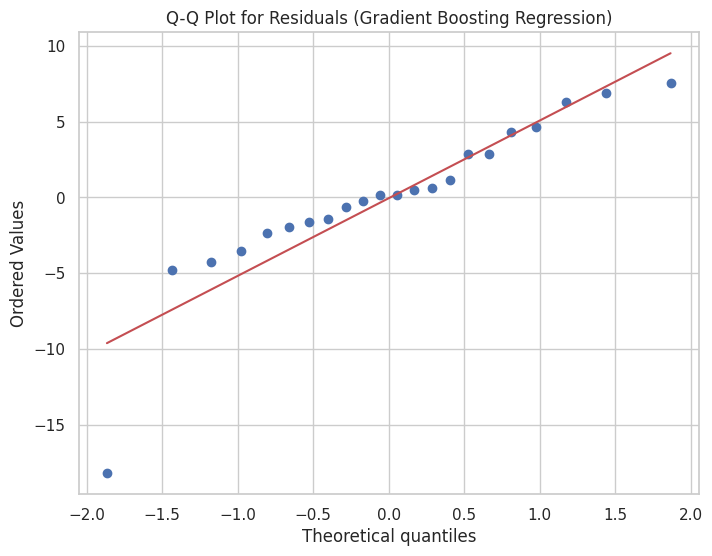

In [61]:

import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate residuals
residuals = y_test - y_pred  # Replace with your actual test data and predicted values

# Create a Q-Q plot for residuals
plt.figure(figsize=(8, 6))
res = stats.probplot(residuals, plot=plt, fit=True, dist='norm')
plt.title('Q-Q Plot for Residuals (Gradient Boosting Regression)')

plt.show()

In [62]:
results

Model  Mean Squared Error  Mean Absolute Error  \
0            Linear Regression          175.869470            10.678009   
1    Support Vector Regression          319.592109            11.196083   
2                Decision Tree           37.506132             3.117159   
3                Random Forest           25.561752             2.983243   
4                     XG Boost            2.799305             1.152102   
5                     CatBoost            6.748753             1.807005   
6                     AdaBoost           70.670393             7.512285   
7            Bagging Regressor          319.632180            11.330632   
8          ExtraTree Regressor           21.222190             2.939956   
9  Gradient Boosting Regressor           27.256667             3.495301   

   R Squared Error  Execution Time  
0         0.218657        0.038954  
1        -0.419866        0.014991  
2         0.833370        0.012223  
3         0.886436        0.176240  
4         0.987563        0.716501  
5         0.970017        0.656284  
6         0.686030        0.105998  
7        -0.420044        0.106612  
8         0.905715        0.037099  
9         0.878906        0.065838

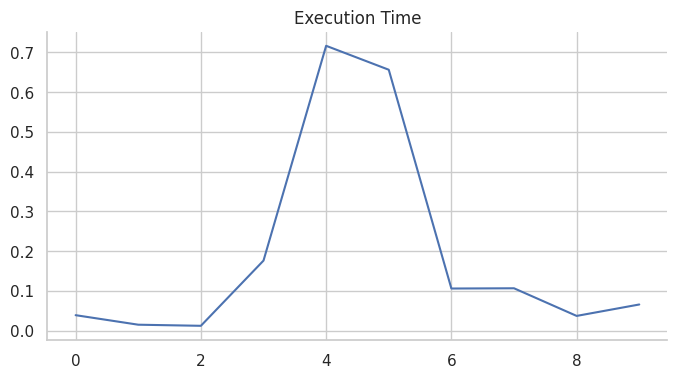

In [63]:
# @title Execution Time

from matplotlib import pyplot as plt
results['Execution Time'].plot(kind='line', figsize=(8, 4), title='Execution Time')
plt.gca().spines[['top', 'right']].set_visible(False)